# Taller de Potabilidad de Agua 

## Load Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model 
import seaborn as sns
from google.colab import files
import io 
from sklearn.metrics import confusion_matrix, accuracy_score

##Import Data

In [ ]:
datos = files.upload()

Saving water_potability.csv to water_potability (1).csv


In [ ]:
dataframe_water = pd.read_csv(io.BytesIO(datos['water_potability.csv']))
dataframe_water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Conociendo los datos 

In [ ]:
dataframe_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
dataframe_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
dataframe_water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
dataframe_water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

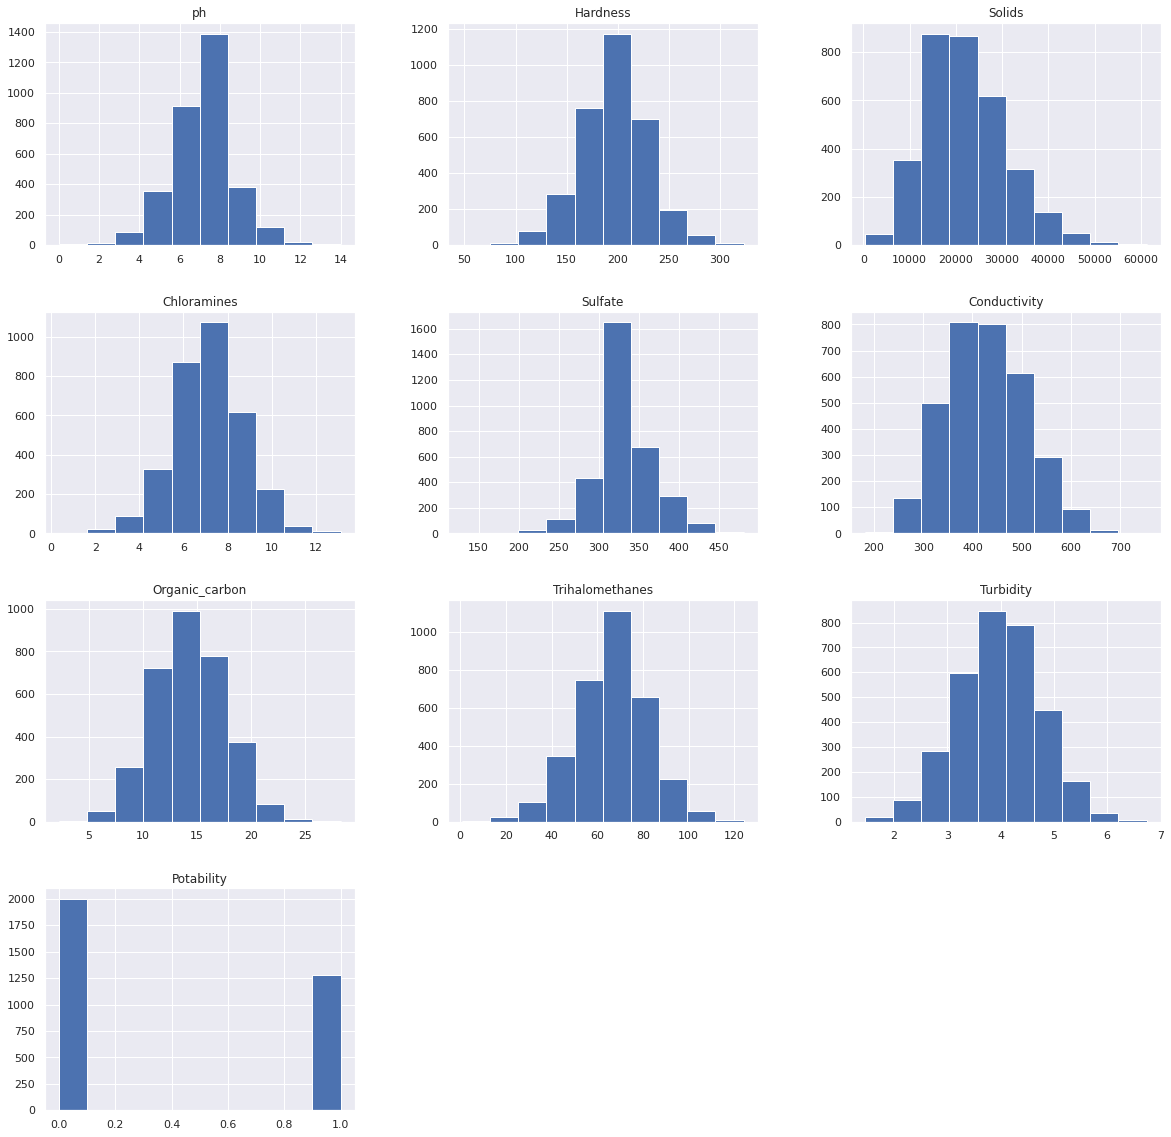

In [91]:
sns.set(rc={'figure.figsize':(20,20)})
dataframe_water.hist()
plt.show()

In [ ]:
dist = pd.plotting.scatter_matrix(dataframe_water, figsize=(100,100), marker='o', alpha=0.8)

## Limpieza de Datos

In [ ]:
dataframe_water['ph'].mean()

7.080794504276821

In [ ]:
dataframe_water['ph'] = dataframe_water['ph'].replace(np.nan, 7.0)

## Matriz de Correlación

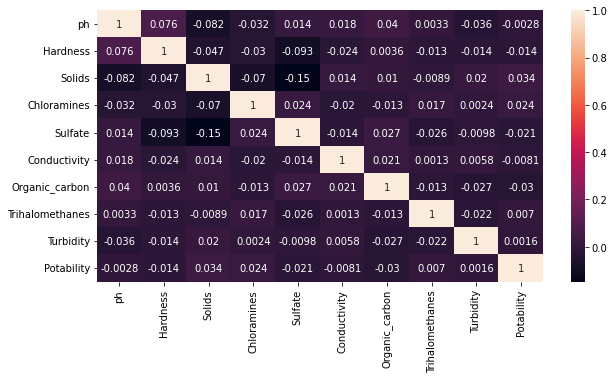

In [69]:
correlacion = dataframe_water.corr()
fig, ax1=plt.subplots(figsize=(10,5))
sns.heatmap(correlacion,annot=True)

In [ ]:
dataframe_water['Sulfate'].mean()

333.77577661081335

In [ ]:
dataframe_water['Sulfate'] = dataframe_water['Sulfate'].replace(np.nan, 333.77)

In [ ]:
dataframe_water['Trihalomethanes'].mean()

66.39629294676803

In [ ]:
dataframe_water['Trihalomethanes'] = dataframe_water['Trihalomethanes'].replace(np.nan, 66.39)

In [ ]:
dataframe_water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.770000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.770000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.770000,392.449580,19.903225,66.390000,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.770000,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.770000,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
dataframe_water.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Graficar 

In [ ]:
dataframe_water.shape

(3276, 10)

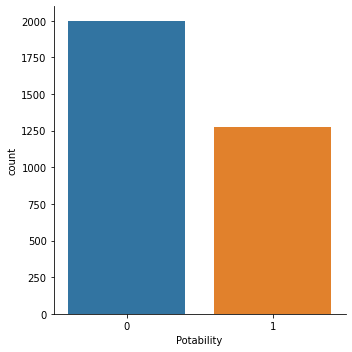

In [ ]:
g = sns.catplot(x = 'Potability', data=dataframe_water, kind='count')

## Preparar Datos y Entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x = dataframe_water.drop(columns='Potability')
y = dataframe_water['Potability']

## Train y Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state =0)

## Instancia del modelo Regresion Logistica

In [71]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Recision del Modelo Regresion Logistica', model.score(x_train, y_train))
print('Exactitud: ', accuracy_score(y_test, y_pred)*100)

Recision del Modelo Regresion Logistica 0.6061068702290077
Exactitud:  62.80487804878049


## Grafica 1 Regresión Logística

[[412   0]
 [244   0]]


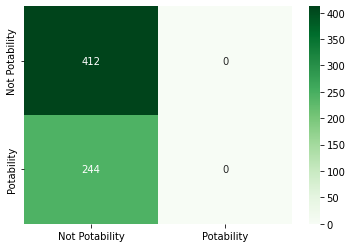

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Potability', 'Potability']
dataframe = pd.DataFrame(cm, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Greens')

## Arboles de Decision

In [90]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=25)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print('Precisión por Árboles de Decisión: ', model2.score(x_train,y_train))
print('Precisión de las pruebas: ', model2.score(x_test, y_test))

Precisión por Árboles de Decisión:  0.9866412213740458
Precisión de las pruebas:  0.5945121951219512


Matriz de Confusión
[[284 128]
 [128 116]]


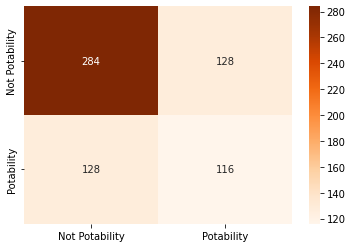

In [ ]:
matriz2 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz2)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matriz2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matriz2.flatten()/np.sum(matriz2)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Potability', 'Potability']
dataframe = pd.DataFrame(matriz2, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Oranges')

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)
print('Precisión por Support Vector Machines: ', model3.score(x_train, y_train))

Precisión por Support Vector Machines:  0.6053435114503817


Matriz de Confusión
[[251 161]
 [154  90]]


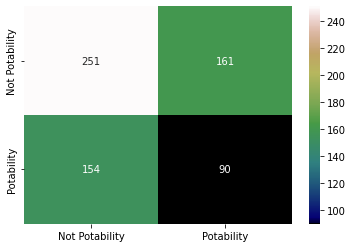

In [ ]:
matriz3 = confusion_matrix(y_test,y_pred)
print('Matriz de Confusión')
print(matriz3)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matriz3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matriz3.flatten()/np.sum(matriz3)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Potability', 'Potability']
dataframe = pd.DataFrame(matriz3, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='gist_earth')

## Vecinos Cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors = 1)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
print('Precisión del vecino más cercano: ', model4.score(x_train, y_train))

Precisión del vecino más cercano:  1.0


Matriz de Confusión
[[251 161]
 [154  90]]


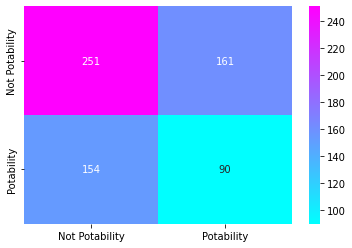

In [ ]:
matriz4 = confusion_matrix(y_test,y_pred)
print('Matriz de Confusión')
print(matriz4)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matriz4.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matriz4.flatten()/np.sum(matriz4)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Potability', 'Potability']
dataframe = pd.DataFrame(matriz4, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='cool')